# PROJECT UPDATE

# Overall Objective:
To identify city services requests patterns of Washington DC in multiple perspectives, and to give advice on city service request fullfillment adjustment. 


# Data Description:
We collected Washington DC City Service Requests datasets of ten years. 

### We have mainly four aspects of attributes: 
1. location/district categories 
2. service categories and descriptions
3. responding departments and wards
4. request filing, handling date and time

### Attributes
Attributes are the same for these ten years.Each dataframe has 30 attributes,which are:

['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS']
 
       
### Corresbonding data type and meaning:

- OBJECTID:'numpy.int64', unique ID;
- SERVICECODE:'str',service code of the request
- SERVICECODEDESCRIPTION:'str', service description in accordance with
- SERVICETYPECODEDESCRIPTION: 'str'
- ORGANIZATIONACRONYM: 'str'
- SERVICECALLCOUNT: 'numpy.int64'
- ADDDATE: 'str'
- RESOLUTIONDATE: 'str'
- SERVICEDUEDATE: 'str'
- SERVICEORDERDATE: 'str'
- INSPECTIONFLAG: 'str'
- INSPECTIONDATE: 'float'
- INSPECTORNAME: 'numpy.float64'
- SERVICEORDERSTATUS: 'str'
- STATUS_CODE: 'str'
- SERVICEREQUESTID: 'str'
- PRIORITY:  'str'
- STREETADDRESS: 'str'
- XCOORD: 'numpy.float64'
- YCOORD: 'numpy.float64'
- LATITUDE: 'numpy.float64'
- CITY: 'str'
- STATE: 'str'
- ZIPCODE: 'numpy.float64'
- MARADDRESSREPOSITORYID: 'numpy.float64'
- WARD: 'numpy.float64'
- DETAILS: 'float'

We'll be using data from 2018 as the primary dataset to analyze request feaures. 'data2018' set has 77776 rows and the same 30 attributes as above.OBJECTID is unique ID.

# First Phase Update

### First phase General Goal
In the first phase, We have 3 goals:
1. we aimed to clean dataframe into clean form ready to perform analysis and get preliminary analysis of 2018 dataframe.
2. to merge relevant data from all ten datasets for future time series analysis.
3. to raise specific questions and analysis directions of next phase.

### For the first phase, specifically we've done:
1. Previewed 2018 dataset (shape, attributes, first few rows, column datatypes)
2. Preliminary missing values, abnormal values, duplicate rows handling 
   - checked overall missing values status and counts
   - deleted 2 columns which are not relevant and containing too many missing values
   - filled in missing values in with 0 for numeric columns containing missing values
   - checked abnormal location values using describe function and there's none
   - checked duplicate rows and there's none
3. Cleaned SERVICECODE, SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION Columns
   - Constructed dictionary to store service code and corresbonding service description
   - deleted SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION columns which are now redundant
4. Cleaned CITY, STATE and ZIPCODE columns
   - Examined values of CITY and STATE columns using unique method
   - Examined values of ZIPCODE column and checked the number of null values, compared with CITY and STATE columns
   - Converted ZIPCODE column from float to integer
   - Deleted 6 rows where ZIPCODE is null 
   - Deleted CITY and STATE columns
5. Cleaned Location relevant columns
   - Decided to use LATITUDE and LONGITUDE as location data
   - Deleted redundant columns (X,Y,XCOORD,YCOORD,street address)
6. Cleaned MARADDRESSREPOSITORYID,WARD Columns
   - Converted these two columns from float to int
   - Checked for abnormal values of WARD columns using unique method
7. Clean time series data for future use
   - Deleted duplicate column
   - Formatted date and time data into clean form
8. Deleted other irrelevant rows and renamed remaining columns

# Pending Tasks
1. Time Seiries Aspect:
  - Check the trends in service requests(Do they tend to be clustered or seasonal
  - First calculate the sum of requests per day, then plot the time series data in line chart
  - Find the trend of number of service requests in a day, whether there is a big difference between mornings and nights
  - Calculate the numbers of service requests in the morning, afternoon, evening, late night each day using time slicing
  - Then plot the time series data of these 4 periods in one line chart and check if there is obvious difference
  - Predict the number of service requests in following days or weeks.
2. Geographical Aspect: 
  - Find which area in WashingtonDC has most service requests in 2018.
  - Aggregate the number of requests according to the zipcode using group by
  - Then order the data and find the largest one. Then we can have a close look at that area and find some insights
3. Service Cartegories Aspect:
  - Find the occur frequencies of different service types
  - Group by the recordes according to the service types and calculate their frequecies
  - Get which kinds of service types have highly demand and give some suggestions to the goverment
4. Combining geographical and datetime analysis and visualizing the results:
  - the distribution map of service requests using latitude and logitude
  - Do clusters of service requests correlate with landmarks, such as museums or shopping malls?
  - Calculate the resolved date of different location and datetime 
5. Comprehensive Analysis:
  - Based on analysis above, we will look at the special weeks or days which have more service requests than regular days. Find the cluster of locations, types or timelines of these days will help us understand the reason why they occur(Maybe it's because that day was a holiday, there was an event around that area, or the weather affect). Taking a look at the column "details"can also help us understand it better. This will benefit the preparation for future situations. For example, if at a weekend there were a lot of service requests about snow/ice removal around a park, that might because of the weather and location of that area. For next time when a snow is coming, we can give the suggestion that more salt should be spread in advance around that area and several snow removal trucks may be needed to clean up the road.
  
# Revised Analysis Direction
So after porposal, we decided to choose this new dataset because we'd like to use one raw dataset which is more close to realistic situation. And with interest in City Service Requests topics which involves operational management and public service management, also relevant to our daily lives, we chosed this dataset from Washington Open Data database. 

In [91]:
import pandas as pd
import numpy as np
%pylab inline
import gmplot

Populating the interactive namespace from numpy and matplotlib


In [33]:
#path='C:/Users/yupei/Desktop/Academics spring/758X Python/project/'

In [34]:
data2018=pd.read_csv('City_Service_Requests_in_2018.csv')

# Know the dataset a little bit
To learn the structure, number of rows, attributes of the dataframe

In [35]:
# Get attribute names
print('Attributs:',data2018.columns)
# Get dataframe shape
print('Dataframe Shape:',data2018.shape)
# Get column data types
for x in data2018.columns:
    print (x,type(data2018[x][0]))

Attributs: Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS'],
      dtype='object')
Dataframe Shape: (77776, 30)
X <class 'numpy.float64'>
Y <class 'numpy.float64'>
OBJECTID <class 'numpy.int64'>
SERVICECODE <class 'str'>
SERVICECODEDESCRIPTION <class 'str'>
SERVICETYPECODEDESCRIPTION <class 'str'>
ORGANIZATIONACRONYM <class 'str'>
SERVICECALLCOUNT <class 'numpy.int64'>
ADDDATE <class 'str'>
RESOLUTIONDATE <class 'str'>
SERVICEDUEDATE <class 'str'>
SERVICEORDERDATE <class 'str'>
INSPECTIONFLAG <class 'str'>
INSPECTIONDATE <class 'float

In [5]:
#Preview the dataframe
data2018.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-76.970417,38.864444,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,1,2018-01-03T10:14:32.000Z,2018-01-03T10:18:35.000Z,...,402567.660000,132957.830000,38.864436,-76.970414,WASHINGTON,DC,20020.0,301454.0,7.0,NaN
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03T09:40:35.000Z,2018-02-22T08:33:38.000Z,...,398099.299996,134827.418747,38.881280,-77.021906,NaN,NaN,20024.0,903906.0,6.0,Traffic signal service request closed to initi...
2,-77.018693,38.930343,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03T10:17:13.000Z,2018-01-16T15:18:05.000Z,...,398379.390000,140272.930000,38.930336,-77.018691,WASHINGTON,DC,20010.0,229343.0,1.0,Closed after ten days no payment received
3,-77.003177,38.903739,307867,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03T10:00:39.000Z,2018-01-08T15:34:03.000Z,...,399724.610000,137319.480000,38.903731,-77.003175,WASHINGTON,DC,20002.0,809549.0,6.0,NaN
4,-76.921593,38.901643,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03T10:16:53.000Z,2018-01-12T07:28:01.000Z,...,406801.370000,137089.690000,38.901635,-76.921591,WASHINGTON,DC,20019.0,7877.0,7.0,sb - Collected – Close SR


In [49]:
#create the dictionary of servicecode
#servicedes=data2018['SERVICECODEDESCRIPTION'].value_counts()
#A=list(servicedes.index)
#A

In [47]:
#servicecode=data2018['SERVICECODE'].value_counts()
#B=list(servicecode.index)


In [50]:
#d = defaultdict(list)
#for i, j in zip(A,B):
    #d[i].append(j)

# Preliminary missing values, abnormal values, duplicate rows handling

In [51]:
# Check if there're missing values
data2018.isnull().values.any()

True

In [52]:
# count null values in each column
data2018.isnull().sum()

X                                 0
Y                                 0
OBJECTID                          0
SERVICECODE                       0
SERVICECODEDESCRIPTION            0
SERVICETYPECODEDESCRIPTION        0
ORGANIZATIONACRONYM               0
SERVICECALLCOUNT                  0
ADDDATE                           0
RESOLUTIONDATE                11902
SERVICEDUEDATE                    3
SERVICEORDERDATE                  0
INSPECTIONFLAG                    0
INSPECTIONDATE                72169
INSPECTORNAME                 77776
SERVICEORDERSTATUS                0
STATUS_CODE                       0
SERVICEREQUESTID                  0
PRIORITY                          0
STREETADDRESS                  5888
XCOORD                            0
YCOORD                            0
LATITUDE                          0
LONGITUDE                         0
CITY                           5886
STATE                          5886
ZIPCODE                           6
MARADDRESSREPOSITORYID      

Since INSPECTIONDATE, INSPECTORNAME have over 70000 null values, these two columns should be deleted. Other null values would be dealt with when we get to specific column.

In [53]:
# Remove INSPECTIONDATE, INSPECTORNAME columns
data2018=data2018.drop('INSPECTIONDATE',axis=1)
data2018=data2018.drop('INSPECTORNAME',axis=1)

In [54]:
# Fill in 0 for WARD, MARADDRESSREPOSITORYID columns which are null
data2018.WARD = data2018.WARD.fillna(0)
data2018.MARADDRESSREPOSITORYID =data2018.MARADDRESSREPOSITORYID.fillna(0)

In [55]:
# Check for location abnoarmal values 
data2018.iloc[:,0:2].describe()

,X,Y
count,77776.000000,77776.000000
mean,-77.014328,38.911971
std,0.038531,0.030820
min,-77.114209,38.813547
25%,-77.038511,38.895054
50%,-77.018913,38.909796
75%,-76.989322,38.932253
max,-76.909760,38.995170


In [56]:
# Check for duplicate rows
len(data2018.OBJECTID.unique()) ==len(data2018)

True

The location data seem to be in reasonable range, and there's no duplicate rows.

# Clean SERVICECODE, SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION Columns
To get a dictionary of servicecode with corresbonding description and type. Then remove redundant information from dataframe.

In [57]:
# construct dictionary as dictionary of servicecode and servicecodedescription, servicecodetypedescription
grouped_servicecode_2018=data2018.groupby('SERVICECODE')

dict_servicecode=dict()
for name,group in grouped_servicecode_2018:
    dict_servicecode[name]=group['SERVICECODEDESCRIPTION'].unique(),group['SERVICETYPECODEDESCRIPTION'].unique()

dict_servicecode

{'11': (array(['Dead Animal Collection'], dtype=object),
  array(['SWMA- Solid Waste Management Admistration'], dtype=object)),
 'BICYCLE': (array(['Abandoned Bicycle'], dtype=object),
  array(['SWMA- Solid Waste Management Admistration'], dtype=object)),
 'C62313': (array(['Christmas Tree Removal-Seasonal'], dtype=object),
  array(['SWMA- Solid Waste Management Admistration'], dtype=object)),
 'CONTREMO': (array(['Container Removal'], dtype=object),
  array(['SWMA- Solid Waste Management Admistration'], dtype=object)),
 'DCGOVTINFO': (array(['DC Government Information'], dtype=object),
  array(['311- Call Center'], dtype=object)),
 'DDENIDTI': (array(['DOEE - Engine Idling Tips'], dtype=object),
  array(['Department of Energy and Environment'], dtype=object)),
 'DDOCONRU': (array(['DOEE - Construction – Erosion Runoff'], dtype=object),
  array(['Department of Energy and Environment'], dtype=object)),
 'DHS06': (array(['DDS - Serious Medication Error'], dtype=object),
  array(['Departm

In [58]:
# remove SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION columns in data2018
data2018=data2018.drop('SERVICECODE',axis=1)
data2018=data2018.drop('SERVICETYPECODEDESCRIPTION',axis=1)
data2018.head()

,X,Y,OBJECTID,SERVICECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-76.970417,38.864444,307864,DMV - Drivers License/ID Issues,DMV,1,2018-01-03T10:14:32.000Z,2018-01-03T10:18:35.000Z,2018-01-04T10:14:00.000Z,2018-01-03T10:14:32.000Z,...,402567.660000,132957.830000,38.864436,-76.970414,WASHINGTON,DC,20020.0,301454.0,7.0,NaN
1,-77.021908,38.881287,307865,Traffic Signal Issue,DDOT,1,2018-01-03T09:40:35.000Z,2018-02-22T08:33:38.000Z,2018-01-05T09:40:00.000Z,2018-01-03T09:40:35.000Z,...,398099.299996,134827.418747,38.881280,-77.021906,NaN,NaN,20024.0,903906.0,6.0,Traffic signal service request closed to initi...
2,-77.018693,38.930343,307866,Recycling Cart Delivery,DPW,1,2018-01-03T10:17:13.000Z,2018-01-16T15:18:05.000Z,2018-01-31T10:17:00.000Z,2018-01-03T10:17:13.000Z,...,398379.390000,140272.930000,38.930336,-77.018691,WASHINGTON,DC,20010.0,229343.0,1.0,Closed after ten days no payment received
3,-77.003177,38.903739,307867,Snow/Ice Removal,DPW,1,2018-01-03T10:00:39.000Z,2018-01-08T15:34:03.000Z,2018-01-04T10:00:39.000Z,2018-01-03T10:00:39.000Z,...,399724.610000,137319.480000,38.903731,-77.003175,WASHINGTON,DC,20002.0,809549.0,6.0,NaN
4,-76.921593,38.901643,307868,Bulk Collection,DPW,1,2018-01-03T10:16:53.000Z,2018-01-12T07:28:01.000Z,2018-01-23T10:16:00.000Z,2018-01-03T10:16:53.000Z,...,406801.370000,137089.690000,38.901635,-76.921591,WASHINGTON,DC,20019.0,7877.0,7.0,sb - Collected – Close SR


# Clean CITY, STATE and ZIPCODE data
To get accurate geological categories; Also to deal with null values.Also convert zipcode datatype to int from float.

In [59]:
#check information of CITY and STATE
print('State info:',data2018.STATE.unique())
print('City info:',data2018.CITY.unique())

# check null information of CITY AND STATE
print('State info where city is null',data2018.STATE[data2018.CITY.isnull()== True].unique())

# check null information of zipcode
print('ObjectID whose Zipcode is null:',data2018.OBJECTID[data2018.ZIPCODE.isnull()== True])

State info: ['DC' nan]
City info: ['WASHINGTON' nan]
State info where city is null [nan]
ObjectID whose Zipcode is null: 24163    334388
32901    348390
34615    350136
39640    357097
40197    357654
46409    365002
Name: OBJECTID, dtype: int64


All requests are from Washington DC or have null values. STATE status of rows which CITY status is null is all null. And only 6 rows have null value in ZIPCODE column. So we decided to drop CITY and STATE columns, and delete rows whose ZIPCODE is null.

In [60]:
# Drop CITY and STATE columns
data2018=data2018.drop('CITY',axis=1)
data2018=data2018.drop('STATE',axis=1)
# Delete rows with no zipcode
data2018=data2018[data2018['ZIPCODE'].isnull()!=True]

In [61]:
# Convert ZIPCODE datatype from float to int.
data2018.ZIPCODE=data2018.ZIPCODE.astype(int)
data2018=data2018.drop(45735)

data2018.head()

,X,Y,OBJECTID,SERVICECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,...,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-76.970417,38.864444,307864,DMV - Drivers License/ID Issues,DMV,1,2018-01-03T10:14:32.000Z,2018-01-03T10:18:35.000Z,2018-01-04T10:14:00.000Z,2018-01-03T10:14:32.000Z,...,STANDARD,2546 NAYLOR ROAD SE,402567.660000,132957.830000,38.864436,-76.970414,20020,301454.0,7.0,NaN
1,-77.021908,38.881287,307865,Traffic Signal Issue,DDOT,1,2018-01-03T09:40:35.000Z,2018-02-22T08:33:38.000Z,2018-01-05T09:40:00.000Z,2018-01-03T09:40:35.000Z,...,STANDARD,NaN,398099.299996,134827.418747,38.881280,-77.021906,20024,903906.0,6.0,Traffic signal service request closed to initi...
2,-77.018693,38.930343,307866,Recycling Cart Delivery,DPW,1,2018-01-03T10:17:13.000Z,2018-01-16T15:18:05.000Z,2018-01-31T10:17:00.000Z,2018-01-03T10:17:13.000Z,...,STANDARD,426 KENYON STREET NW,398379.390000,140272.930000,38.930336,-77.018691,20010,229343.0,1.0,Closed after ten days no payment received
3,-77.003177,38.903739,307867,Snow/Ice Removal,DPW,1,2018-01-03T10:00:39.000Z,2018-01-08T15:34:03.000Z,2018-01-04T10:00:39.000Z,2018-01-03T10:00:39.000Z,...,STANDARD,200 - 219 BLOCK OF L STREET NE,399724.610000,137319.480000,38.903731,-77.003175,20002,809549.0,6.0,NaN
4,-76.921593,38.901643,307868,Bulk Collection,DPW,1,2018-01-03T10:16:53.000Z,2018-01-12T07:28:01.000Z,2018-01-23T10:16:00.000Z,2018-01-03T10:16:53.000Z,...,STANDARD,5528 HUNT PLACE NE,406801.370000,137089.690000,38.901635,-76.921591,20019,7877.0,7.0,sb - Collected – Close SR


# Clean exact location information
We decided to use LATITUDE and LONGITUDE as excat location coordinates and remove the relative location coordinates columns XCOORD, YCOORD, X, Y, street address

In [62]:
data2018=data2018.drop('XCOORD',axis=1)
data2018=data2018.drop('YCOORD',axis=1)
data2018=data2018.drop('X',axis=1)
data2018=data2018.drop('Y',axis=1)
data2018=data2018.drop('STREETADDRESS',axis=1)

In [63]:
data2018.head()

,OBJECTID,SERVICECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,307864,DMV - Drivers License/ID Issues,DMV,1,2018-01-03T10:14:32.000Z,2018-01-03T10:18:35.000Z,2018-01-04T10:14:00.000Z,2018-01-03T10:14:32.000Z,N,CLOSED,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454.0,7.0,NaN
1,307865,Traffic Signal Issue,DDOT,1,2018-01-03T09:40:35.000Z,2018-02-22T08:33:38.000Z,2018-01-05T09:40:00.000Z,2018-01-03T09:40:35.000Z,N,CLOSED,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906.0,6.0,Traffic signal service request closed to initi...
2,307866,Recycling Cart Delivery,DPW,1,2018-01-03T10:17:13.000Z,2018-01-16T15:18:05.000Z,2018-01-31T10:17:00.000Z,2018-01-03T10:17:13.000Z,N,CLOSED,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343.0,1.0,Closed after ten days no payment received
3,307867,Snow/Ice Removal,DPW,1,2018-01-03T10:00:39.000Z,2018-01-08T15:34:03.000Z,2018-01-04T10:00:39.000Z,2018-01-03T10:00:39.000Z,Y,CLOSED,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549.0,6.0,NaN
4,307868,Bulk Collection,DPW,1,2018-01-03T10:16:53.000Z,2018-01-12T07:28:01.000Z,2018-01-23T10:16:00.000Z,2018-01-03T10:16:53.000Z,N,CLOSED,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877.0,7.0,sb - Collected – Close SR


# Clean MARADDRESSREPOSITORYID,WARD Columns
We've already fill null values with 0. Now we could convert datatype to int from float.

In [64]:
# Convert MARADDRESSREPOSITORYID,WARD Columns datatype to int
data2018.MARADDRESSREPOSITORYID=data2018.MARADDRESSREPOSITORYID.astype(int)
data2018.WARD=data2018.WARD.astype(int)

In [65]:
# Check for abnormal values
data2018.WARD.unique()

array([7, 6, 1, 2, 3, 5, 8, 4, 0])

# Clean datetime columns

In [66]:
# Remove duplicate column
data2018=data2018.drop('SERVICEORDERDATE',axis=1) 

In [67]:
# Transform 4 columns containing time series data to clean form
data2018['ADDDATE'] = pd.to_datetime(data2018['ADDDATE'], format='%Y-%m-%dT%H:%M:%S')
data2018['RESOLUTIONDATE'] = pd.to_datetime(data2018['RESOLUTIONDATE'], format='%Y-%m-%dT%H:%M:%S')
data2018['SERVICEDUEDATE'] = pd.to_datetime(data2018['SERVICEDUEDATE'], format='%Y-%m-%dT%H:%M:%S')

In [68]:
data2018.head()

,OBJECTID,SERVICECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,INSPECTIONFLAG,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,307864,DMV - Drivers License/ID Issues,DMV,1,2018-01-03 10:14:32,2018-01-03 10:18:35,2018-01-04 10:14:00,N,CLOSED,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454,7,NaN
1,307865,Traffic Signal Issue,DDOT,1,2018-01-03 09:40:35,2018-02-22 08:33:38,2018-01-05 09:40:00,N,CLOSED,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906,6,Traffic signal service request closed to initi...
2,307866,Recycling Cart Delivery,DPW,1,2018-01-03 10:17:13,2018-01-16 15:18:05,2018-01-31 10:17:00,N,CLOSED,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343,1,Closed after ten days no payment received
3,307867,Snow/Ice Removal,DPW,1,2018-01-03 10:00:39,2018-01-08 15:34:03,2018-01-04 10:00:39,Y,CLOSED,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549,6,NaN
4,307868,Bulk Collection,DPW,1,2018-01-03 10:16:53,2018-01-12 07:28:01,2018-01-23 10:16:00,N,CLOSED,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877,7,sb - Collected – Close SR


# Remove other irrelevant columns and rename remaining columns

In [69]:
# Remove other irrelevant columns
data2018=data2018.drop('SERVICECALLCOUNT',axis=1)
data2018=data2018.drop('INSPECTIONFLAG',axis=1)
data2018=data2018.drop('STATUS_CODE',axis=1)

In [70]:
# Rename remaining columns
data2018.columns = ['object_id','service_code','organization_acronym','add_date','resolution_date','servicedue_date','service_status','service_request_id','priority','latitude','logitude','zipcode','address_repository_id','ward_id','details']

In [71]:
data2018.head()

,object_id,service_code,organization_acronym,add_date,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,logitude,zipcode,address_repository_id,ward_id,details
0,307864,DMV - Drivers License/ID Issues,DMV,2018-01-03 10:14:32,2018-01-03 10:18:35,2018-01-04 10:14:00,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454,7,NaN
1,307865,Traffic Signal Issue,DDOT,2018-01-03 09:40:35,2018-02-22 08:33:38,2018-01-05 09:40:00,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906,6,Traffic signal service request closed to initi...
2,307866,Recycling Cart Delivery,DPW,2018-01-03 10:17:13,2018-01-16 15:18:05,2018-01-31 10:17:00,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343,1,Closed after ten days no payment received
3,307867,Snow/Ice Removal,DPW,2018-01-03 10:00:39,2018-01-08 15:34:03,2018-01-04 10:00:39,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549,6,NaN
4,307868,Bulk Collection,DPW,2018-01-03 10:16:53,2018-01-12 07:28:01,2018-01-23 10:16:00,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877,7,sb - Collected – Close SR


In [72]:
data2018['zipcode'].value_counts()

20002    9097
20011    7544
20019    6521
20001    6497
20009    5406
20020    4693
20003    3790
20010    3457
20007    3434
20016    3197
20032    2484
20018    2439
20008    2336
20015    2232
20005    2105
20017    2103
20036    1925
20012    1796
20024    1769
20037    1557
20006    1261
20004     966
20052     489
20059      97
20415      76
20240      39
20405      31
20250      29
20060      28
20565      16
         ... 
20202       3
20529       3
20049       3
20422       3
20607       3
20227       2
20593       2
20429       2
20549       2
20590       2
20418       1
20229       1
20747       1
20547       1
20520       1
20441       1
20743       1
20223       1
20228       1
20506       1
20543       1
20221       1
20505       1
20536       1
20062       1
20451       1
20372       1
20439       1
20460       1
20746       1
Name: zipcode, Length: 101, dtype: int64

In [73]:
#data2018['service_code'].value_counts()

Bulk Collection                                  11683
Parking Meter Repair                             10930
Parking Enforcement                               8941
Pothole                                           3825
Emergency No-Parking Verification                 3750
Roadway Signs                                     3125
Streetlight Repair Investigation                  2968
Trash Collection - Missed                         2876
Sanitation Enforcement                            2590
Recycling Collection - Missed                     2124
Residential Parking Permit Violation              2062
Illegal Dumping                                   1627
Abandoned Vehicle - On Public Property            1498
Graffiti Removal                                  1446
Tree Inspection                                    951
Rodent Inspection and Treatment                    934
Alley Cleaning                                     900
Sidewalk Repair                                    886
Traffic Si

In [74]:
data2018['ward_id'].value_counts()

2    14073
6    12292
5    10046
4     9648
1     8785
7     8557
3     7933
8     5588
0      847
Name: ward_id, dtype: int64

In [75]:
#add the time to resolute the request=resolution_date-add_date

In [76]:
#urgent issue
data2018['priority'].value_counts()

STANDARD    77763
URGENT          6
Name: priority, dtype: int64

In [82]:
data2018.head()

,object_id,service_code,organization_acronym,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,logitude,zipcode,address_repository_id,ward_id,details
add_date,,,,,,,,,,,,,,
2018-01-03 10:14:32,307864,DMV - Drivers License/ID Issues,DMV,2018-01-03 10:18:35,2018-01-04 10:14:00,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454,7,NaN
2018-01-03 09:40:35,307865,Traffic Signal Issue,DDOT,2018-02-22 08:33:38,2018-01-05 09:40:00,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906,6,Traffic signal service request closed to initi...
2018-01-03 10:17:13,307866,Recycling Cart Delivery,DPW,2018-01-16 15:18:05,2018-01-31 10:17:00,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343,1,Closed after ten days no payment received
2018-01-03 10:00:39,307867,Snow/Ice Removal,DPW,2018-01-08 15:34:03,2018-01-04 10:00:39,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549,6,NaN
2018-01-03 10:16:53,307868,Bulk Collection,DPW,2018-01-12 07:28:01,2018-01-23 10:16:00,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877,7,sb - Collected – Close SR


In [83]:
#set add_time as index
df=data2018
df.set_index('add_date', inplace=True)

In [88]:
#take a close look at certain period
df.loc['20180402 07':'20180402 12']['service_code'].value_counts()

Bulk Collection                                         95
Parking Enforcement                                     85
Parking Meter Repair                                    70
Pothole                                                 27
Emergency No-Parking Verification                       22
Sanitation Enforcement                                  21
Roadway Signs                                           19
Illegal Dumping                                         14
Residential Parking Permit Violation                    14
Alley Cleaning                                          11
Streetlight Repair Investigation                        11
Rodent Inspection and Treatment                         11
Trash Collection - Missed                               10
Traffic Signal Issue                                     9
DMV - Drivers License/ID Issues                          9
Tree Inspection                                          7
Abandoned Vehicle - On Public Property                  

In [89]:
#convert dataset to day-period
df1=df.to_period('D')
df1.head()

,object_id,service_code,organization_acronym,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,logitude,zipcode,address_repository_id,ward_id,details
add_date,,,,,,,,,,,,,,
2018-01-03,307864,DMV - Drivers License/ID Issues,DMV,2018-01-03 10:18:35,2018-01-04 10:14:00,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454,7,NaN
2018-01-03,307865,Traffic Signal Issue,DDOT,2018-02-22 08:33:38,2018-01-05 09:40:00,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906,6,Traffic signal service request closed to initi...
2018-01-03,307866,Recycling Cart Delivery,DPW,2018-01-16 15:18:05,2018-01-31 10:17:00,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343,1,Closed after ten days no payment received
2018-01-03,307867,Snow/Ice Removal,DPW,2018-01-08 15:34:03,2018-01-04 10:00:39,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549,6,NaN
2018-01-03,307868,Bulk Collection,DPW,2018-01-12 07:28:01,2018-01-23 10:16:00,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877,7,sb - Collected – Close SR


D - Day
H - Hour
T or min - Minute
M - MonthEnd
Q - QuarterEnd
A - Year

Text(0.5,0,'day of 2018')

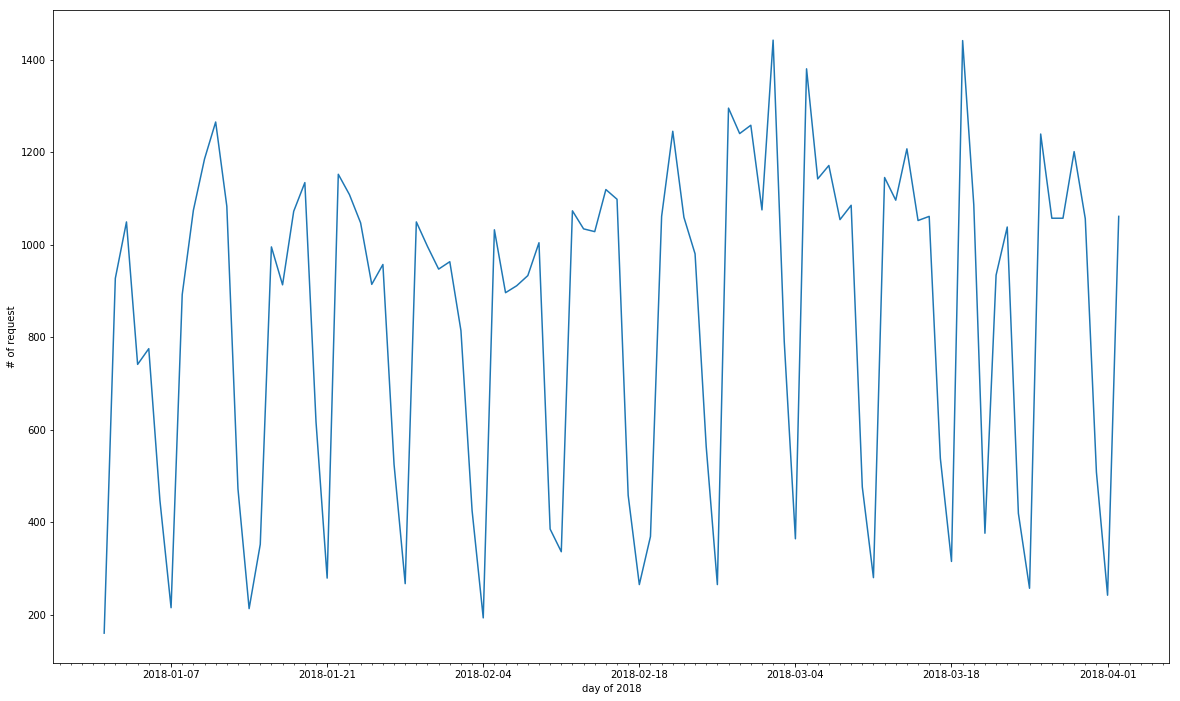

In [105]:
# Downsample count of request to daily measurements 
#df['service_code'].countplot(figsize=(8,4))
#plt.figure(figsize=(20,12))
#df['service_code'].resample('H').count().plot()
from matplotlib import dates

days = dates.DayLocator()

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(days)

ax.plot(df['service_code'].resample('D').count())
ax.set_ylabel('# of request')
ax.set_xlabel('day of 2018')

#plt.legend(('# of service'))
#plt.xticks(arange(130, step=1))  # 201 since you want 200 displayed in the grap

From the plot above we can see that the number of requests experienced periodly drop and rise. On weekdays, the number of total requests kept going up and reached highest point on Wednesday or Thursday. At the weekend, the requests decreased quickly and reached its lowest point on Sunday. There seems to be no obvious trend through time change.

In this way, we count the number of requests in day unit. Now we want to take a close look at whether there are any patterns in a day. 

In [122]:
df2=df.loc['20180103 00':'20180203 00']
df2.tail()

,object_id,service_code,organization_acronym,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,logitude,zipcode,address_repository_id,ward_id,details
add_date,,,,,,,,,,,,,,
2018-02-03 00:50:04,337367,Parking Enforcement,DPW,2018-02-03 06:24:38,2018-02-05 17:00:00,CLOSED,18-00060171,STANDARD,38.895928,-76.980530,20002,57808,6,DID NOT RECIEVE A CALL BACK FOR VEHICLES TO BE...
2018-02-03 00:52:20,337368,Parking Enforcement,DPW,2018-02-03 02:14:18,2018-02-05 17:00:00,CLOSED,18-00060173,STANDARD,38.917700,-76.973439,20002,286743,5,PARKING OFFICER ISSUED 20 TICKETS @2:00AM
2018-02-02 08:15:28,340815,Abandoned Vehicle - On Public Property,DPW,2018-02-12 10:24:39,2018-02-08 17:00:00,CLOSED,18-00058148,STANDARD,38.826186,-77.000608,20032,303719,8,2/8/18 NOTHING WAS FOUND WITH RESPECT TO THE V...
2018-02-02 12:10:33,341124,Abandoned Vehicle - On Public Property,DPW,2018-02-06 09:30:48,2018-02-09 12:10:00,CLOSED,18-00059022,STANDARD,38.924740,-76.972704,20018,49585,5,2/5/18 NOTHING WAS FOUND WITH RESPECT TO THE V...
2018-02-02 18:29:59,341126,Parking Enforcement,DPW,2018-02-05 12:25:41,2018-02-09 17:00:00,CLOSED,18-00060058,STANDARD,38.871865,-76.937561,20019,26637,7,2/5/18 THE VEHICLE IN QUESTION DID NOT MEET TH...


Text(0,0.5,'# of request')

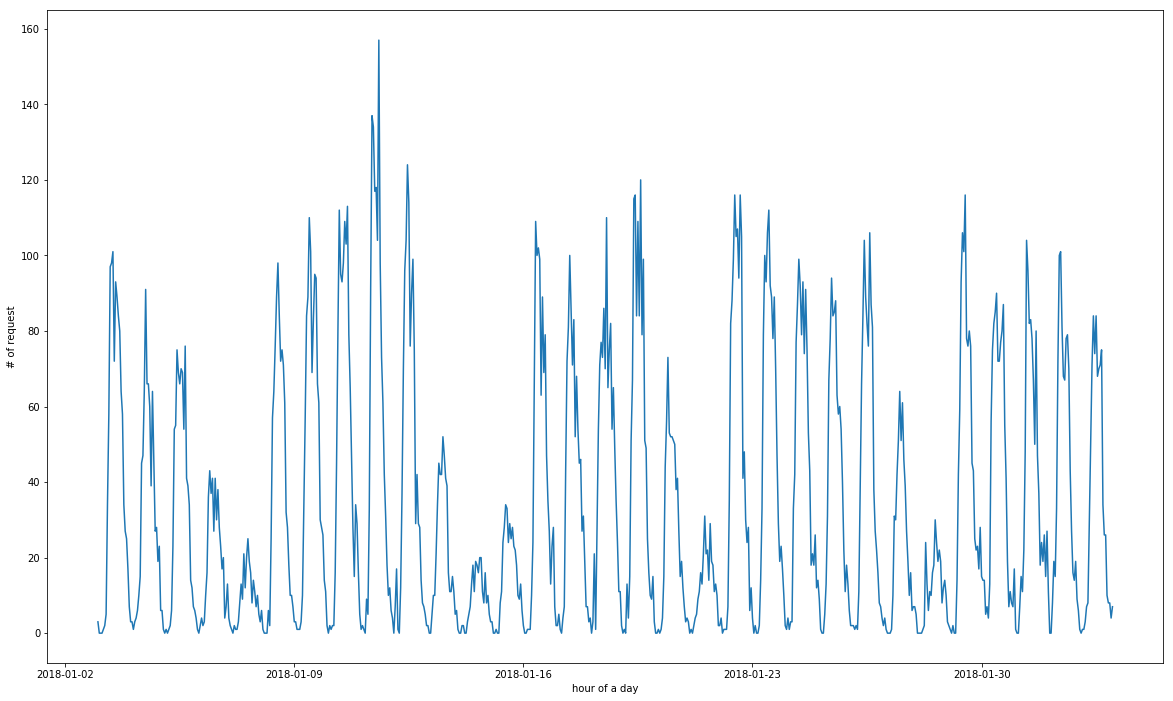

In [123]:
#hours = dates.HourLocator()

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
#ax.xaxis.set_minor_locator(hours)

ax.plot(df2['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

From the plot of one month we can see that there seems to be a pattern in each day, so we decide to choose to zoom in to one week and find what exactly it is.

Text(0,0.5,'# of request')

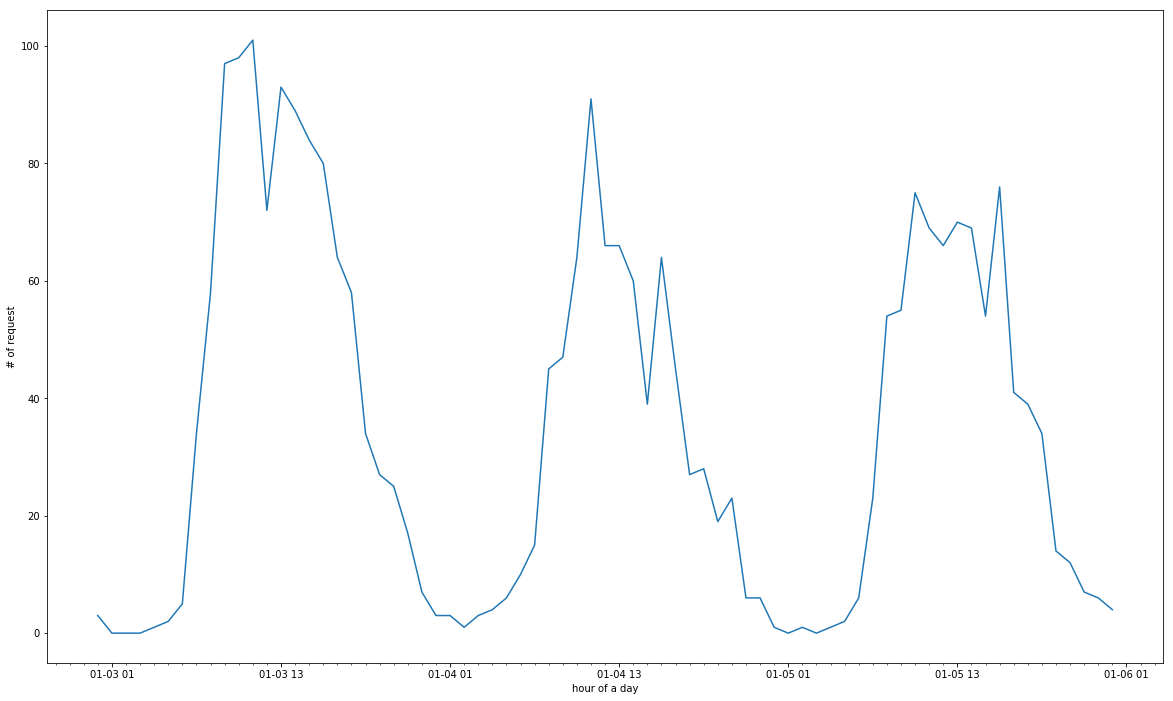

In [146]:
df3=df.loc['20180103 00':'20180106 00']

hours = dates.HourLocator()

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(hours)


ax.plot(df3['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

(add_date
 2018-01-03 11:00:00    101
 Freq: H, Name: service_code, dtype: int64, 101)

We can see that the peak time is two or three hour before 13:00, which is the also the busy time for people's daily life.Number of requests goes down after that, and reaches lowest point at 01:00 am, when everyone is tend to stay at home sleeping. The trend is obvious though there are some variations on each day.

Now we want to find the peak point 

In [162]:
#days = dates.DayLocator()

#fig = plt.figure(figsize=(20,12))
#ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
#ax.xaxis.set_minor_locator(days)
#
#ax.plot(df['service_code'].resample('D').count())
#ax.set_ylabel('# of request')
#ax.set_xlabel('day of 2018')
#




y=df['service_code'].resample('D').count()
ymax = max(y)


xmax = y[y==ymax]

print(xmax,ymax)


#ax.annotate('local max', xy=(xmax, ymax), xytext=(xmax, ymax+5),
          #  arrowprops=dict(facecolor='black', shrink=0.05),         )

#df['service_code'].resample('D').count()

add_date
2018-03-02    1442
Freq: D, Name: service_code, dtype: int64 1442


In [163]:
ymax_2=max(y[y<ymax])
xmax_2=y[y==ymax_2]
print(xmax_2,ymax_2)


add_date
2018-03-19    1441
Freq: D, Name: service_code, dtype: int64 1441
